# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from ipywidgets import interact, IntSlider
from sklearn.metrics import accuracy_score
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [4]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [5]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

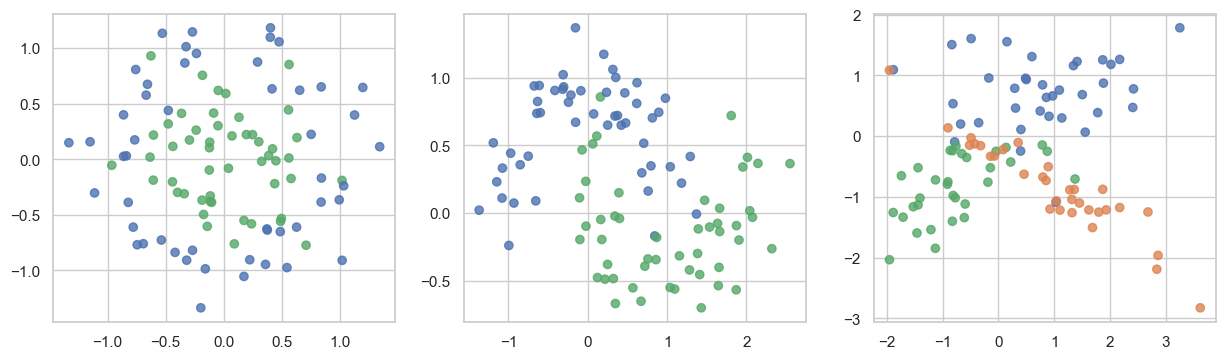

In [6]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [7]:
def plot_surface(clf, X, y, ax):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    return ax

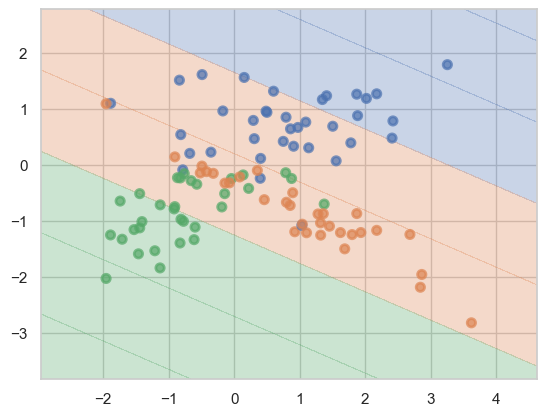

In [8]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y, plt)
plt.show()

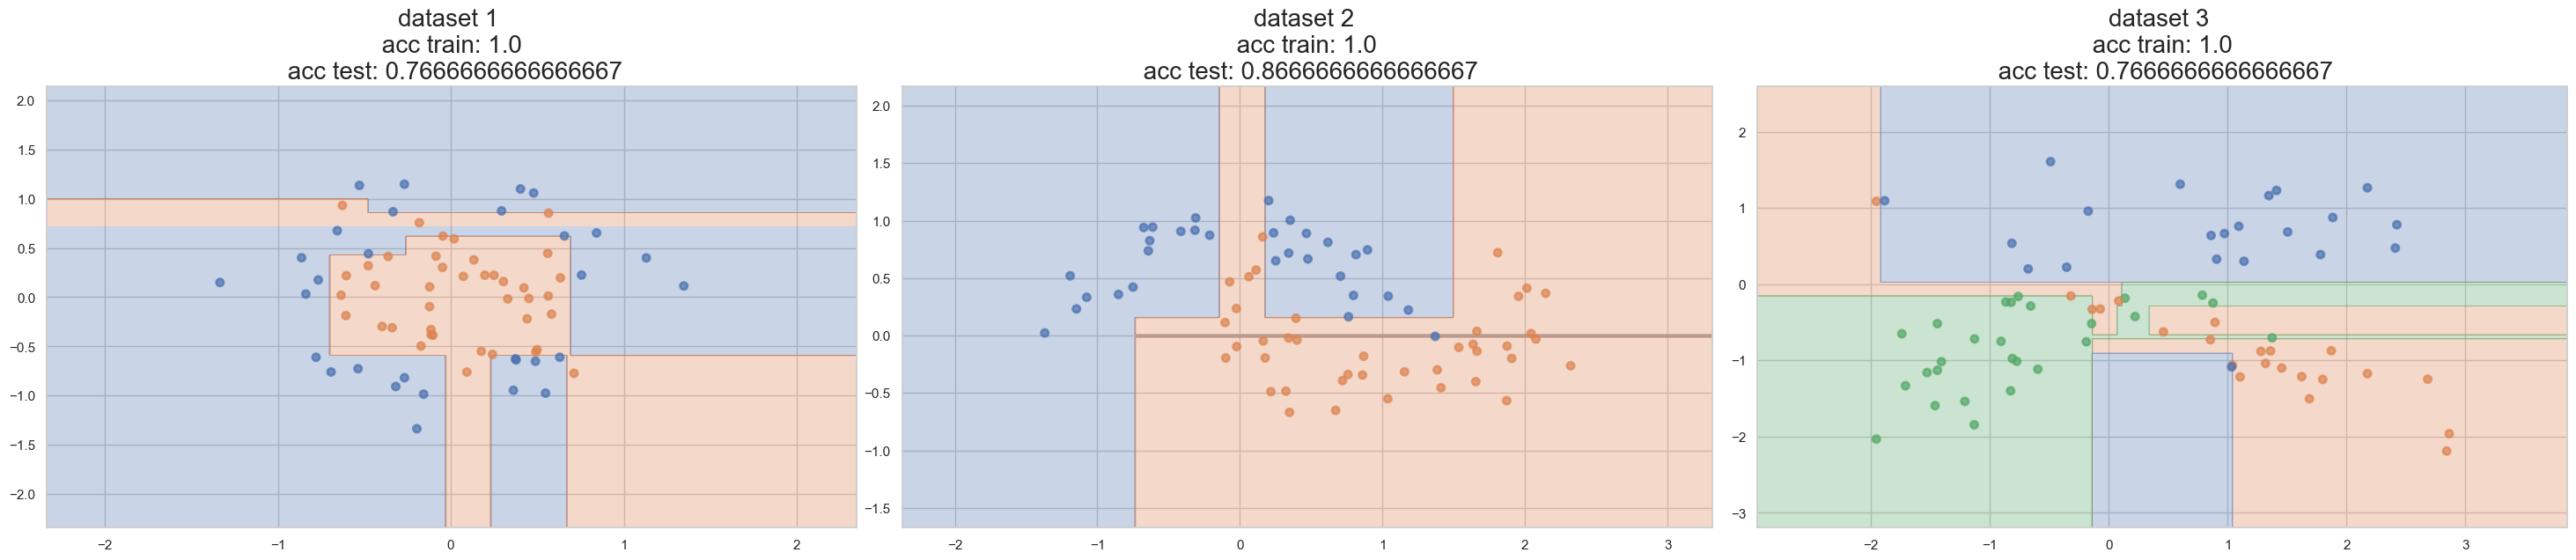

In [9]:
f, ax = plt.subplots(1, 3, figsize=(30, 7))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier().fit(x_train, y_train)
    y_pred_train = clf.predict(x_train)
    accuracy_train = accuracy_score(y_pred_train, y_train)
    y_pred_test = clf.predict(x_test)
    accuracy_test = accuracy_score(y_pred_test, y_test)
    plot_surface(clf, x_train, y_train, ax[i])
    ax[i].set_title(f'dataset {i+1} \n acc train: {accuracy_train} \n acc test: {accuracy_test}', fontsize=20)
plt.show()
    
    

__Ответ:__ второе переобучилось меньше всех, там меньше разделяющих областей

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [10]:
def plot_tree(max_depth=1, min_leaf=1):
    f, ax = plt.subplots(1, 3, figsize=(30, 7))

    for i, (x, y) in enumerate(datasets):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_leaf, random_state=42)
        clf.fit(x_train, y_train)

        y_pred_test = clf.predict(x_test)
        y_pred_train = clf.predict(x_train)

        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)


        plot_surface(clf, x_train, y_train, ax[i])

        ax[i].set_xlabel('feature 1')
        ax[i].set_ylabel('feature 2')
        ax[i].set_title(f'dataset {i+1} \n train acc: {np.round(train_accuracy, 4)} \n test acc: {np.round(test_accuracy, 4)}', fontsize=19)
    plt.show()


depth_slider = IntSlider(min=1, max=10, value=1, description='Max Depth')
min_samples_slider = IntSlider(min=1, max=10, value=1, description='Min Samples Leaf')

interact(plot_tree, max_depth=depth_slider, min_leaf=min_samples_slider)
plt.show()

interactive(children=(IntSlider(value=1, description='Max Depth', max=10, min=1), IntSlider(value=1, descripti…

__Ответ:__
Чем больше максимальная глубина и чем меньше количество объектов в листе, тем больше дерево переробучивается, то есть у параметров противоположные эффекты. Баланс между непереобучением и хорошей обобщающей способностью достигается на Min Samples Leaf >=5. При максимальном Min Samples Leaf вне зависимости от глубины обобщающая способность на высоте и разделение поверхности почти не меняется. Для третьего датасета с 3 классами в целом изменения не радикальные.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

успешная посылка: https://contest.yandex.ru/contest/56884/run-report/102334554/

ник: lipperrdino

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [11]:
data_students = pd.read_csv('students.csv')


In [12]:
from hw5code import find_best_split

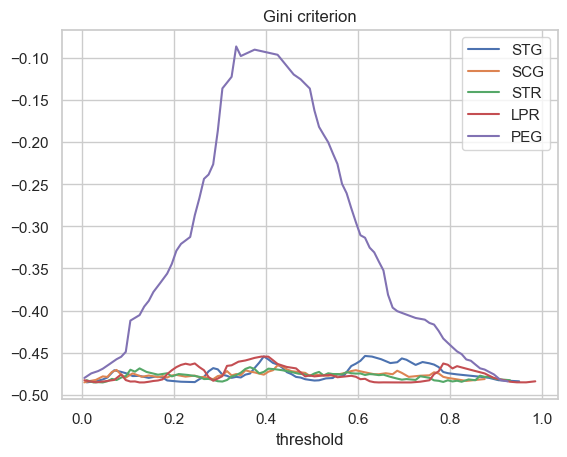

In [13]:
for feature in ['STG', 'SCG', 'STR', 'LPR', 'PEG']:
    t, gini, _, _ = find_best_split(data_students[feature], data_students['UNS'].to_numpy())
    plt.plot(t, gini)
plt.legend(['STG', 'SCG', 'STR', 'LPR', 'PEG'])
plt.title('Gini criterion')
plt.xlabel('threshold')
plt.show()


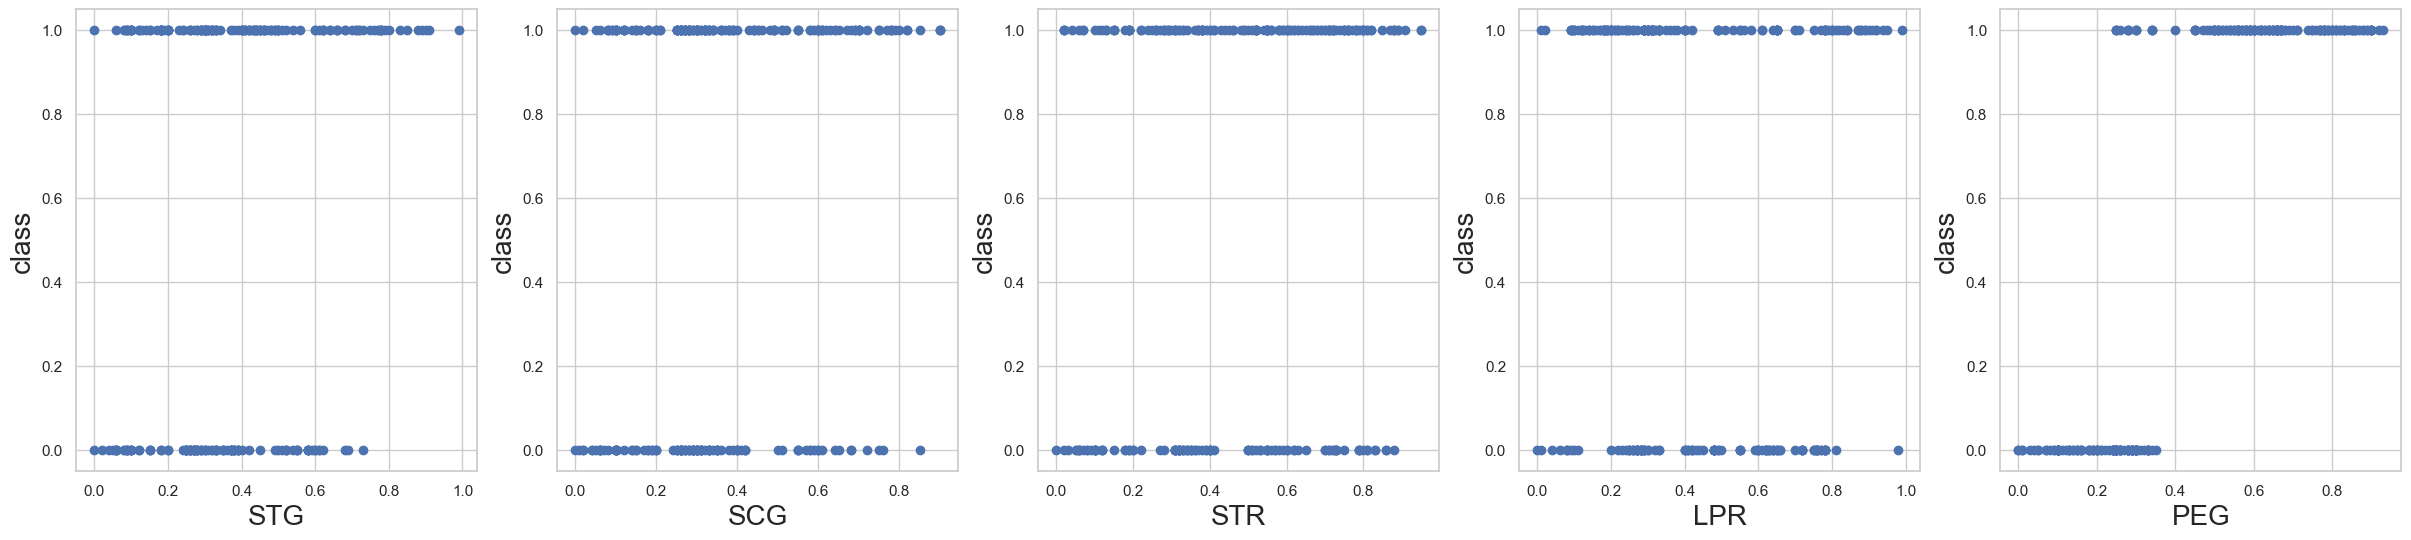

In [14]:
f, ax = plt.subplots(1, 5, figsize=(30, 6))
for i, feature in enumerate(['STG', 'SCG', 'STR', 'LPR', 'PEG']):
    ax[i].scatter(data_students[feature], data_students['UNS'])
    ax[i].set_xlabel(feature, fontsize=20)
    ax[i].set_ylabel('class', fontsize=20)
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** 
- **Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева?**
Признак PEG максимально отличается от остальных по критерию Джини, напоминает гауссиану. По нему лучше всего производить деление выборки на два поддерева, потому что можно добиться почти такой же информативности, при этом корректно разбить выборку на два класса.

- **Согласуется ли этот результат с визуальной оценкой scatter-графиков?**
Действительно, на scatter графике видно более четкое разделение на классы в зависимости от значений признака. Это разделение происходит на 0.3-0.4, там же пик у гауссианы.

- **Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально?**
Уже сказано, такой признак один и вид кривой - гауссиана

- **Чем отличаются кривые для признаков, по которым деление практически невозможно?**
В целом мало чем, так как диапазон значений примерно одинаковый и колебания у всех маленькие


__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

успешная посылка: https://contest.yandex.ru/contest/56884/run-report/101256520/  
ник: lipperrdino

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [15]:
from sklearn.preprocessing import LabelEncoder
from hw5code import DecisionTree

In [16]:
data_agaricus = pd.read_csv('mushroom/agaricus-lepiota.data')
data_agaricus


,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [17]:
encoder = LabelEncoder()
for col in data_agaricus.columns:
    data_agaricus[col] = encoder.fit_transform(data_agaricus[col])


In [18]:
x_train, x_test, y_train, y_test = train_test_split(data_agaricus.drop(columns=['p']), data_agaricus['p'], test_size=0.5, random_state=42, stratify=data_agaricus['p'])
clf = DecisionTree(list(['categorical']*x_train.shape[1]))
clf.fit(x_train.to_numpy(), y_train.to_numpy())
y_pred = clf.predict(x_test.to_numpy())
acc = accuracy_score(y_test.to_numpy(), y_pred)
acc

1.0

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [19]:
# качаем в том числе для след задания
urls = [
    'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
    'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
    'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
    'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data'
]
data = [pd.read_csv(url) for url in urls]


In [20]:
data[0].rename(columns={'p':'target'}, inplace=True)
data[1].rename(columns={'positive':'target'}, inplace=True)
data[2].rename(columns={'unacc':'target'}, inplace=True)
data[3].rename(columns={'recommend':'target'}, inplace=True)

In [21]:



data[2].loc[(data[2]['target'] == 'good') | (data[2]['target'] == 'vgood'), 'target'] = 1
data[2].loc[(data[2]['target'] == 'unacc') | (data[2]['target'] == 'acc'), 'target'] = 0
data[3].loc[(data[3]['target'] == 'very_recom') | (data[3]['target'] == 'priority'), 'target'] = 1
data[3].loc[(data[3]['target'] == 'not_recom') | (data[3]['target'] == 'recommend') | (data[3]['target'] == 'spec_prior'), 'target'] = 0

data[2]['target'] = data[2]['target'].astype(int)
data[3]['target'] = data[3]['target'].astype(int)

encoder = LabelEncoder()

for col in data[0].columns:
    data[0][col] = encoder.fit_transform(data[0][col])
for col in data[1].columns:
    data[1][col] = encoder.fit_transform(data[1][col])
for col in data[2].columns[:-1]:
    data[2][col] = encoder.fit_transform(data[2][col])
for col in data[3].columns[:-1]:
    data[3][col] = encoder.fit_transform(data[3][col])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data[1].drop(columns=['target']), data[1]['target'], test_size=0.3, random_state=42, stratify=data[1]['target'])
space = np.arange(2, 51, 1)

In [23]:
accuracy_metrics = {'max_depth':[], 'min_samples_split':[], 'min_samples_leaf':[]}

for param in space:
    clf = DecisionTree(list(['categorical']*x_train.shape[1]), max_depth=param)
    clf.fit(x_train.to_numpy(), y_train.to_numpy())
    y_pred = clf.predict(x_test.to_numpy())
    accuracy_metrics['max_depth'].append(accuracy_score(y_test.to_numpy(), y_pred))

    clf = DecisionTree(list(['categorical']*x_train.shape[1]), min_samples_split=param)
    clf.fit(x_train.to_numpy(), y_train.to_numpy())
    y_pred = clf.predict(x_test.to_numpy())
    accuracy_metrics['min_samples_split'].append(accuracy_score(y_test.to_numpy(), y_pred))

    clf = DecisionTree(list(['categorical']*x_train.shape[1]), min_samples_leaf=param)
    clf.fit(x_train.to_numpy(), y_train.to_numpy())
    y_pred = clf.predict(x_test.to_numpy())
    accuracy_metrics['min_samples_leaf'].append(accuracy_score(y_test.to_numpy(), y_pred))

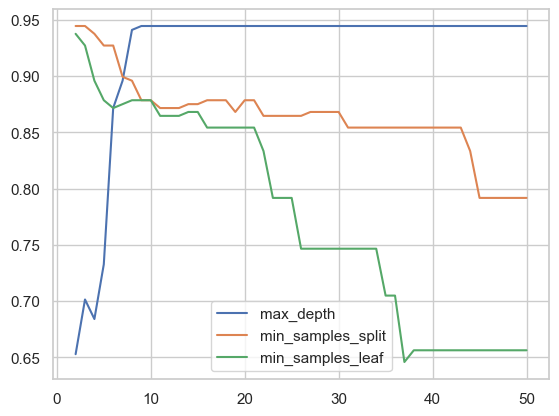

In [24]:
line1, = plt.plot(space, accuracy_metrics['max_depth'], label='max_depth')
line2, = plt.plot(space, accuracy_metrics['min_samples_split'], label='min_samples_split')
line3, = plt.plot(space, accuracy_metrics['min_samples_leaf'], label='min_samples_leaf')
plt.legend(handles=[line1, line2, line3])
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. 

Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [31]:
cols = ['DecisionTree real', 'DecisionTree categorical', 'DecisionTree real+ohe', 'DecisionTreeClassifier']
index = ['mushrooms', 'tic-tac-toe', 'cars', 'nurcery']
results = pd.DataFrame(columns=['DecisionTree real', 'DecisionTree categorical', 'DecisionTree real+ohe', 'DecisionTreeClassifier'], index=['mushrooms', 'tic-tac-toe', 'cars', 'nurcery'])

* DecisionTree, считающий все признаки вещественными


In [32]:
for i in range(4):
    n = data[i].shape[1]-1
    metrics = cross_val_score(DecisionTree(feature_types=list(['real']*n)), data[i].drop(columns=['target']).values, data[i]['target'].values, scoring=make_scorer(accuracy_score), cv=10, error_score="raise")
    results[cols[0]][index[i]] = metrics.mean()

* DecisionTree, считающий все признаки категориальными


In [33]:
for i in range(4):
    n = data[i].shape[1]-1
    metrics = cross_val_score(DecisionTree(feature_types=np.array(list(['categorical']*n))), data[i].drop(columns=['target']).values, data[i]['target'].values, scoring=make_scorer(accuracy_score), cv=10, error_score="raise")
    results[cols[1]][index[i]] = metrics.mean()

* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков


In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
for i in range(4):
    
    encoder = OneHotEncoder(sparse_output=False)
    x_encoded = encoder.fit_transform(data[i].drop(columns=['target']))
    n = x_encoded.shape[1]
    metrics = cross_val_score(DecisionTree(feature_types=list(['real']*n)), x_encoded, data[i]['target'].values, scoring=make_scorer(accuracy_score), cv=10, error_score="raise")
    results[cols[2]][index[i]] = metrics.mean()

* DecisionTreeClassifier из sklearn. 


In [36]:
for i in range(4):
    n = data[i].shape[1]-1
    metrics = cross_val_score(DecisionTreeClassifier(criterion='gini'), data[i].drop(columns=['target']).values, data[i]['target'].values, scoring=make_scorer(accuracy_score), cv=10, error_score="raise")
    results[cols[3]][index[i]] = metrics.mean()

In [37]:
results

,DecisionTree real,DecisionTree categorical,DecisionTree real+ohe,DecisionTreeClassifier
mushrooms,0.999261,1.0,0.999631,0.95829
tic-tac-toe,0.462697,0.549265,0.55352,0.754868
cars,0.9426,0.967519,0.921767,0.944952
nurcery,0.907639,0.923688,0.866281,0.791321


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

Можно заметить, что на датасете tic-tac-toe все методы на нашем дереве сработали не очень хорошо. DecisionTreeClassifier сильно лучше, но по сравдению с остальными датасетами все равно плохо. Для mushrooms все методы сработали отлично, DecisionTreeClassifier даже чуть чуть хуже. В этом датасете больше всего признаков, это могло сильно повлиять, так как у нас больше критериев для разделения данных. Для cars примерно одинаково и тоже хорошо, для nurcery DecisionTreeClassifier сработал сильно хуже остальных, то есть для этих данных жадный алгоритм, видимо, подходит лучше, а вот для tic-tac-toe наоборот. Плюс в tic-tac-toe очень мало данных, поэтому сложно хорошо жадно обучить дерево. В целом для разных данных одной зависимости у методов нет.

Можно попробовать перебрать количество фолдов для оценки методов, возможно для датасетов с меньшим количеством данных большее число фолдов сыграет роль, хотя стоит опасаться переобучения. Компонента случайности присутствует, хотя это очень сильно зависит от данных.

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания:

хочу спать месяц